In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score      # used for evaluating the model

# from sklearn.ensemble import RandomForestClassifier  # For Random Forest model
# from sklearn.tree import DecisionTreeClassifier


-> Data collection and Processing

In [3]:
df = pd.read_csv('train.csv')  

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [9]:
#getting some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-> Handling the Missing values

In [13]:
# drop the cabin column from data frame because maximum data is null
df = df.drop(columns = 'Cabin', axis = 1)

In [15]:
#replacing the missing values in age column with mean value
df['Age'].fillna(df['Age'].mean(), inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1440\290976752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [17]:
# replace the missing values in Embarked column with mode value

print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [19]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [21]:
print(df['Embarked'].mode()[0])

S


In [23]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1440\1994620826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

-> Data Analysis

In [27]:
# getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
print(df['Survived'].value_counts())  # number of people survived or not survived

Survived
0    549
1    342
Name: count, dtype: int64


-> Data Visualization

In [31]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

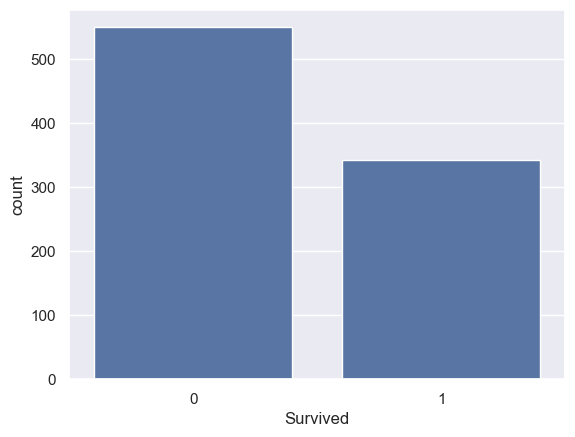

In [33]:
# making a count plot for "survived" column

sns.countplot(x = 'Survived',data=df)

In [35]:
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

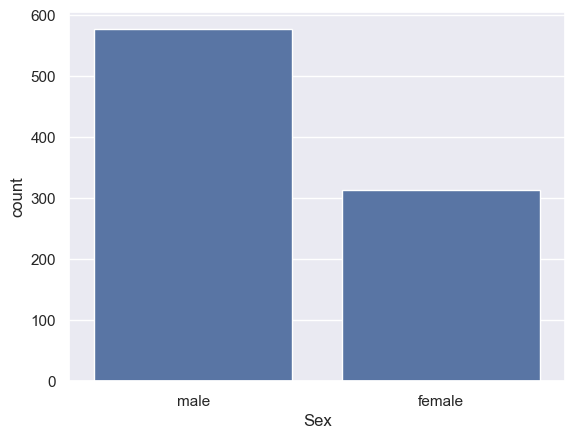

In [37]:
# making a count plot for "sex" column

sns.countplot(x = 'Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

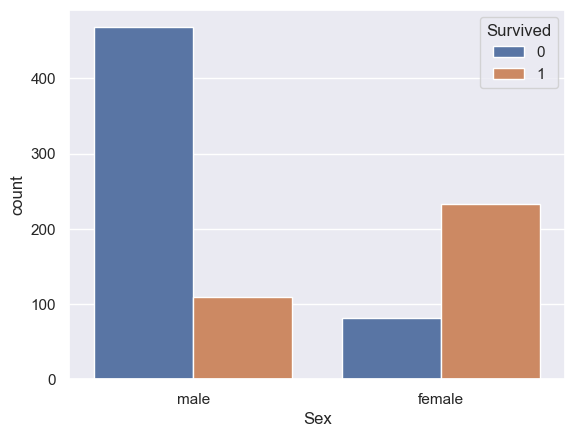

In [39]:
# number of survivours on the sex based

sns.countplot(x = 'Sex', hue = 'Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

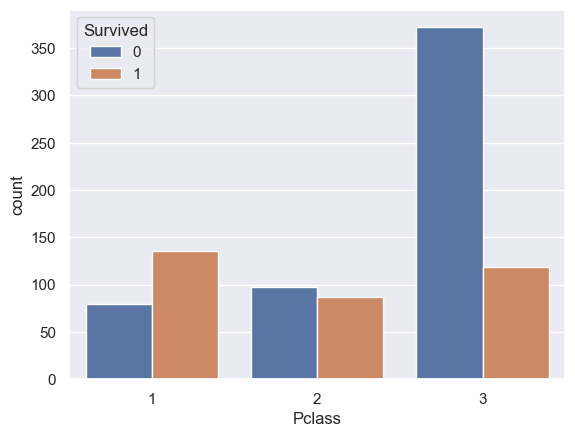

In [41]:
# number of survivours on the Pclass  based

sns.countplot(x = 'Pclass', hue = 'Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

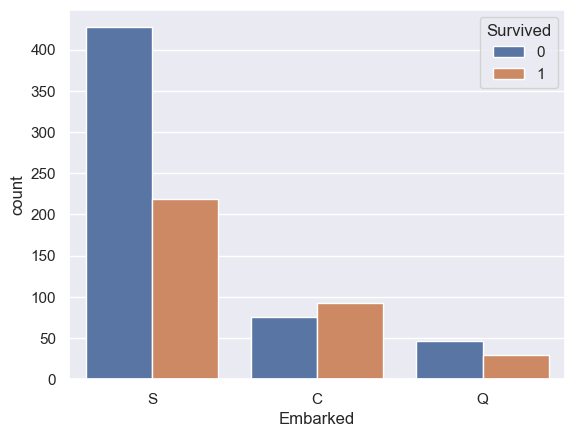

In [43]:
# number of survivours on the Embarked  based

sns.countplot(x = 'Embarked', hue = 'Survived', data=df)

-> Encoding the categorical columns

In [45]:
# Replacing male with 0 and female with 1

df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1440\99879099.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


-> seperating features and target columns

In [49]:
x= df.drop(columns = ['Name','PassengerId','Ticket','Fare','Survived'], axis=1)
y= df['Survived']

In [51]:
print(x)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    0  22.000000      1      0         0
1         1    1  38.000000      1      0         1
2         3    1  26.000000      0      0         0
3         1    1  35.000000      1      0         0
4         3    0  35.000000      0      0         0
..      ...  ...        ...    ...    ...       ...
886       2    0  27.000000      0      0         0
887       1    1  19.000000      0      0         0
888       3    1  29.699118      1      2         0
889       1    0  26.000000      0      0         1
890       3    0  32.000000      0      0         2

[891 rows x 6 columns]


In [53]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


-> splitting the data into training and test data

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

In [214]:
print(x.shape,x_train.shape, x_test.shape)

(891, 6) (846, 6) (45, 6)


-> Logistic Regression Model Training

In [242]:
model = LogisticRegression()

In [219]:
# model = RandomForestClassifier()

In [236]:
# model = DecisionTreeClassifier()

In [244]:
#training the LR model with training data
model.fit(x_train,y_train)

LogisticRegression()

-> Model Evaluation

In [246]:
x_train_prediction = model.predict(x_train)

In [248]:
print(x_train_prediction)

[0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 

In [250]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy in training data : ', training_data_accuracy)

Accuracy in training data :  0.8014184397163121


In [252]:
# For testing data

x_test_prediction = model.predict(x_test)

In [254]:
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy in testing data : ', testing_data_accuracy)

Accuracy in testing data :  0.8444444444444444
